In [424]:
!pip install pivottablejs

In [425]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from pivottablejs import pivot_ui
import imblearn


In [426]:
!pip install imbalanced-learn




In [427]:
data = pd.read_csv(r"C:\Users\ADITYA\Downloads\aug_train.csv")      # A raw string literal in Python is used when we want to treat backslashes (\) as literal characters, rather than escape characters.
data.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0


In [428]:
data.city = data.city.apply(lambda x: int(x.split('_')[1]))
data.city

0        103
1         40
2         21
3        115
4        162
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19158, dtype: int64

In [429]:
data.shape

(19158, 14)

In [430]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [431]:
data.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [432]:
data["education_level"].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [433]:
data["education_level"].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [434]:
data["company_size"].nunique()

8

In [435]:
data["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [436]:
    def pie_chart(data,col):
        targets = list(data[col].value_counts().index)
        values = list((data[col].value_counts()*100/len(data[col])).values)
        fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
        fig.show()

In [437]:
pie_chart(data,'relevent_experience')

In [438]:
categorical_columns = list(data.select_dtypes(include=['object']).dtypes.index)
print(categorical_columns)

['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [439]:
def pie_chart(data, categorical_columns):
    for col in categorical_columns:
        targets = list(data[col].value_counts().index)
        values = list((data[col].value_counts() * 100 / len(data[col])).values)
        
        fig = px.pie(values=values, 
                     names=targets, 
                     color_discrete_sequence=['darkcyan', 'lawngreen'], 
                     title=col)
        fig.show()

In [440]:
pie_chart(data, categorical_columns)

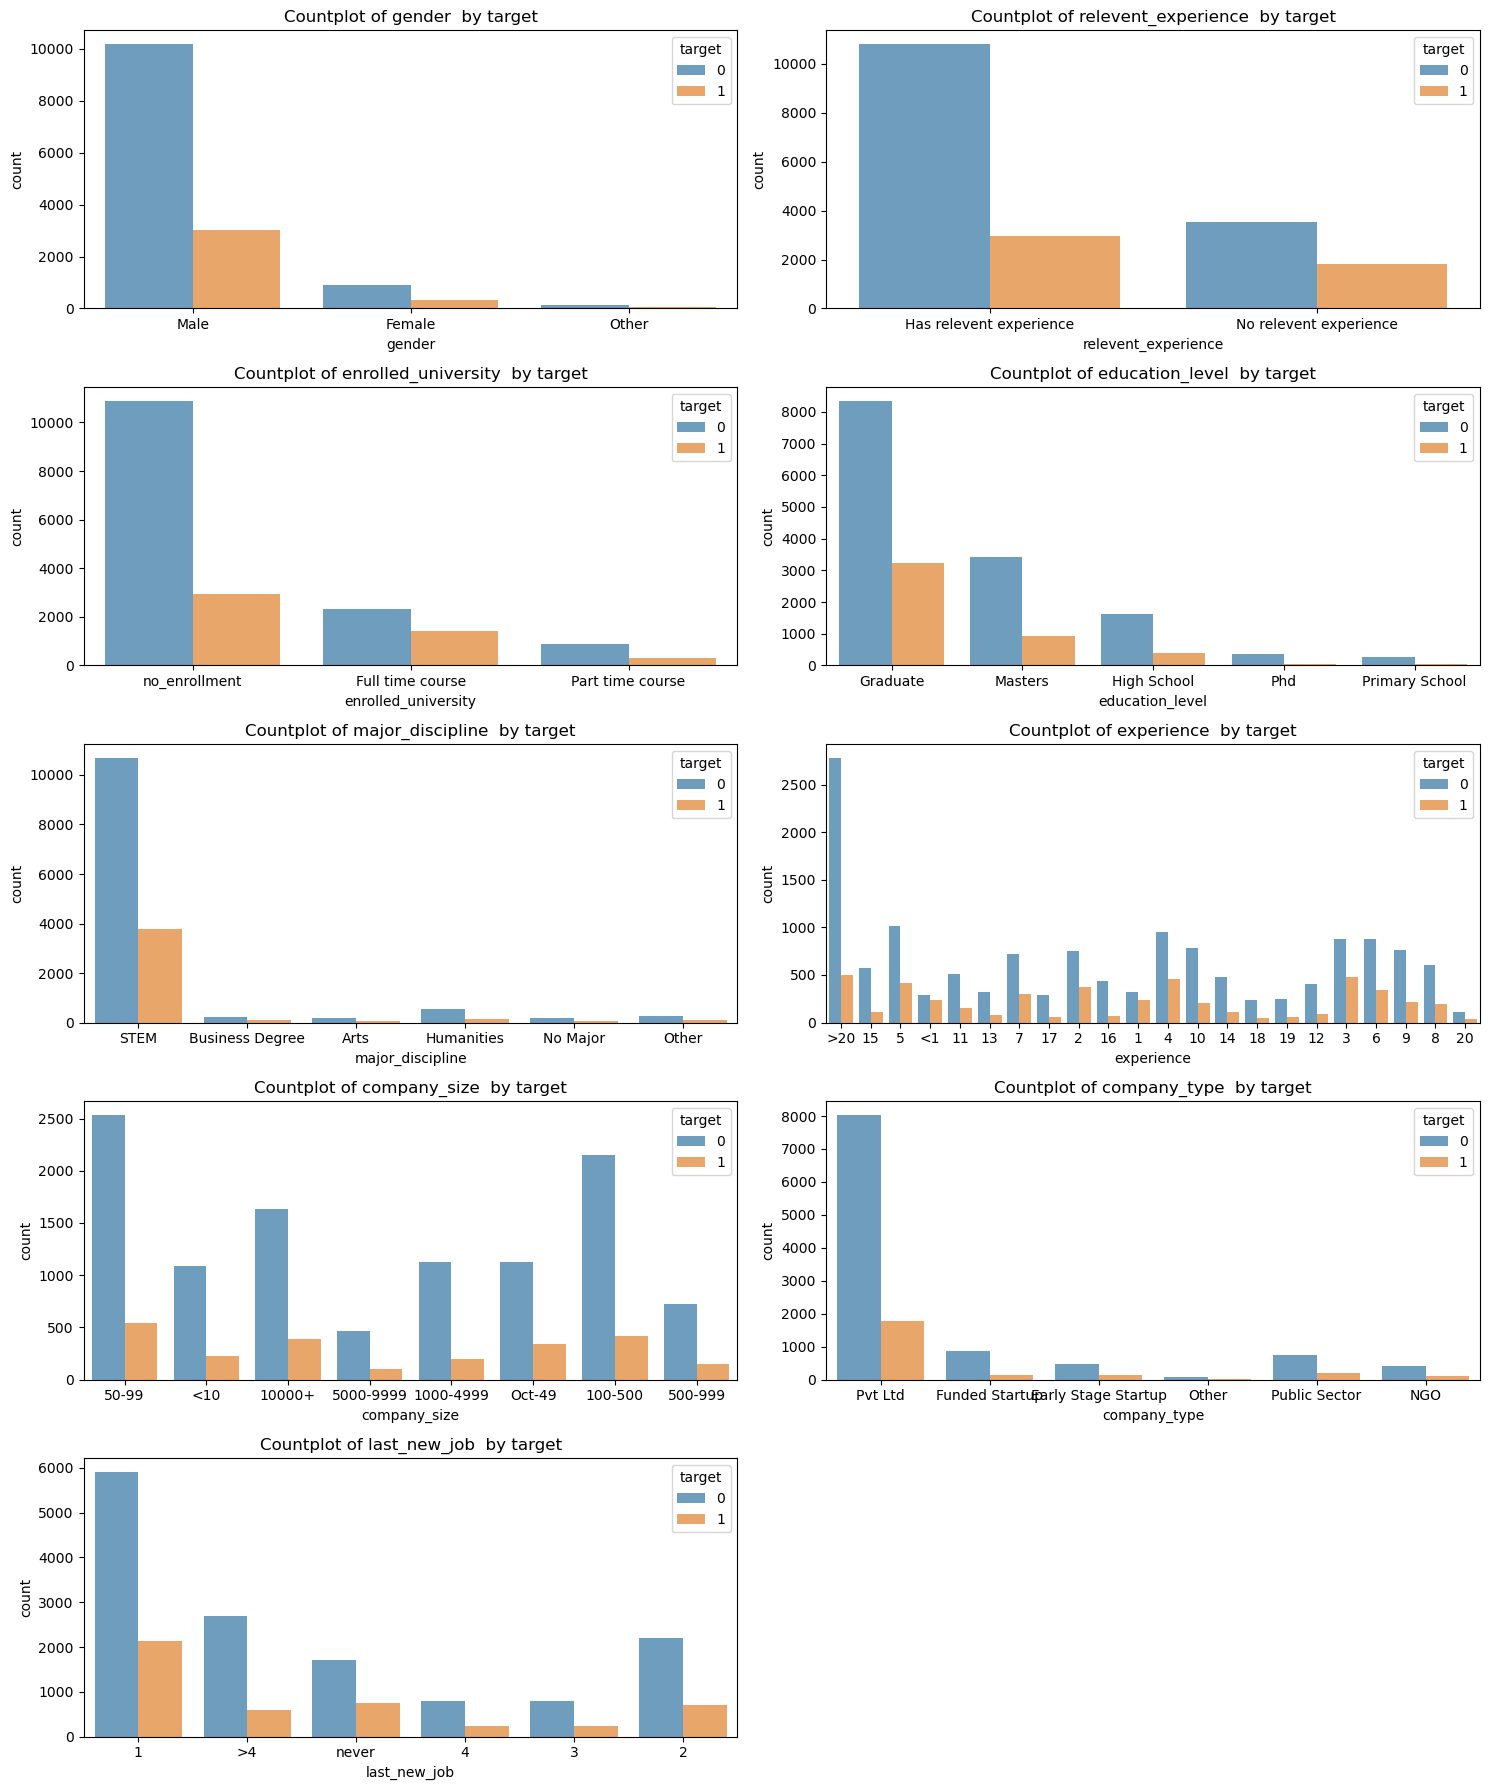

In [441]:
#count plots - Check frequency of feature (cat) wrt Target Variable (cat)

plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()
#univariate distribution check and checking wrt each cat variable for target- insights to mark

In [442]:
#do for loop of boxplot to show distribution of continuous variables wrt target- add insights

<Axes: xlabel='target', ylabel='training_hours'>

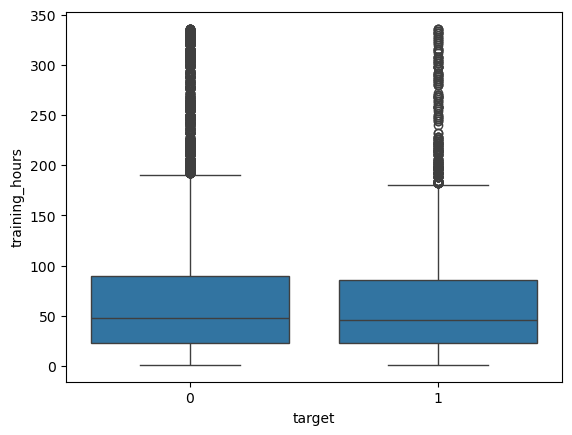

In [443]:
sns.boxplot(y='training_hours',x='target',data=data)

<Axes: xlabel='target', ylabel='city_development_index'>

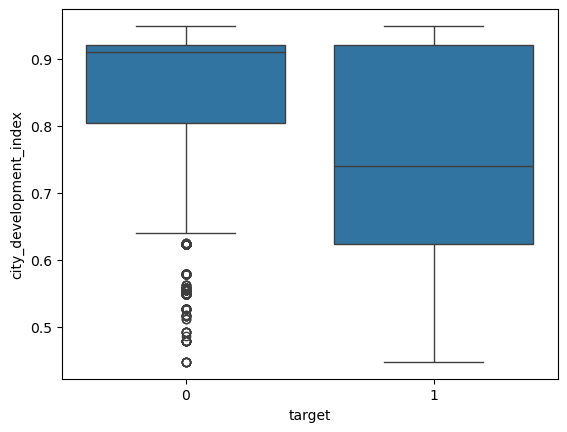

In [444]:
sns.boxplot(x='target',y='city_development_index',data=data)

<Axes: xlabel='major_discipline,education_level'>

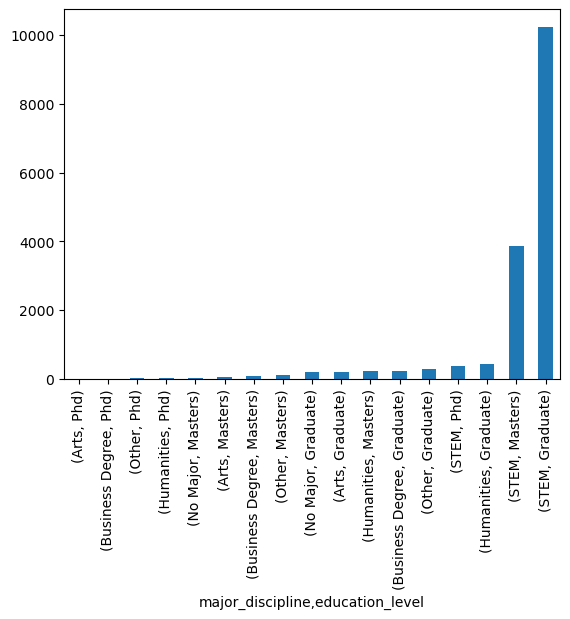

In [445]:
data[['major_discipline', 'education_level']].value_counts().sort_values().plot(kind='bar')

In [446]:
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)
#we can also set up threshold of number of unique categories to define if a col is categorical or continuous

#we can check the univariate distribution of each continuous variable and also the distribution of each cont vars wrt target through boxplot.

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_95736\1137875481.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'skew: 1.8190947994281477')

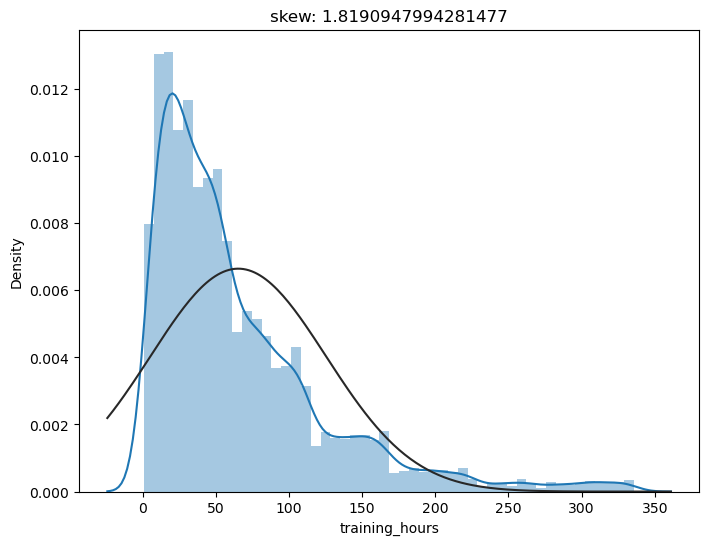

In [447]:
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'],fit=norm)
plt.title('skew: {}'.format(skew(data['training_hours'])))

In [448]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4498
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [449]:
data.gender.isna().sum()

4498

In [450]:
data.gender.value_counts()

gender
Male      13216
Female     1253
Other       191
Name: count, dtype: int64

In [451]:
data.major_discipline.value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [452]:
data.enrolled_university = data.enrolled_university.fillna('no_enrollment') #mode
# can also check wrt correlated column

In [453]:
data.company_type = data.company_type.fillna('Pvt Ltd') #mode
#data['company_type'] = data['company_type'].fillna(data['company_type'].mode()[0])

In [454]:
data.gender = data.gender.fillna('Male')

In [455]:
data.major_discipline = data.major_discipline.fillna('STEM') #mode

In [456]:
data.education_level = data.education_level.fillna(method='ffill')
#forward fill - ffill
#backward fill - bfill

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_95736\3980676690.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [457]:
data.experience = data.experience.fillna(method='ffill')

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_95736\2081777421.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [458]:
data.company_size = data.company_size.fillna(method = 'ffill')

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_95736\1837329244.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [459]:
data.last_new_job = data.last_new_job.fillna(method = 'bfill')

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_95736\1901974711.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [460]:
le = LabelEncoder()
data.gender = le.fit_transform(data['gender']) #nominal
#you can do .map as well

In [461]:
data.relevent_experience = le.fit_transform(data['relevent_experience']) #nominal

In [462]:
data.enrolled_university = le.fit_transform(data['enrolled_university']) #nominal

In [463]:
ordinal_education_level = {'Primary School':0, 'High School':1, 'Graduate':2, 'Masters':3, 'Phd':4}
data.education_level = data.education_level.map(ordinal_education_level) #ordinal

In [464]:
data.isnull().sum()
#fill the remaining missing value

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [465]:
data.major_discipline = le.fit_transform(data['major_discipline']) #nominal

In [466]:
#ordinal
ordinal_experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, 
                      '6':6, '7':7, '8':8, '9':9, '10':10,
                      '11':11, '12':12, '13':13, '14':14, 
                      '15':15, '16':16, '17':17, '18':18, '19':19, '20':20, '>20':21}
data.experience = data.experience.map(ordinal_experience)

In [467]:
#ordinal
ordinal_company_size = {'<10':0, 'Oct-49':1, '50-99':2, '100-500':3, 
                        '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
data.company_size = data.company_size.map(ordinal_company_size)

#Oct-49 is an outlier which is likely 10-49 in company_size col 

In [468]:
data.company_size.value_counts()

company_size
2.0    4501
3.0    3765
7.0    2900
1.0    2108
5.0    1935
0.0    1853
4.0    1280
6.0     815
Name: count, dtype: int64

In [469]:
data.company_type = le.fit_transform(data['company_type']) #nominal

In [470]:
#Ordinal
ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}
data.last_new_job = data.last_new_job.map(ordinal_last_new_job)

In [471]:
data.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,2,5,21,NaN,5,1,36,1
1,29725,40,0.776,1,1,2,2,5,15,2.0,5,5,47,0


In [472]:
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [473]:
data.dropna(inplace = True) # you can also impute the missing value with bfill or me/median/mode/any correlated col

In [474]:
data= data.drop('enrollee_id',axis=1)
#never save dataset if using inplace=True (permanent deletion)

In [475]:
data.city

1         40
2         21
3        115
4        162
5        176
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19157, dtype: int64

In [476]:
from scipy import stats
z = np.abs(stats.zscore(data[['city_development_index', 'training_hours']]))
print(z) #standard normal distribution
#minmax scalar- values will range betwwen 0 and 1
#we can use other scaling methods too

       city_development_index  training_hours
1                    0.428366        0.305844
2                    1.660532        0.293575
3                    0.322983        0.222592
4                    0.501323        0.955216
5                    0.525642        0.688807
...                       ...             ...
19153                0.398482        0.389097
19154                0.738949        0.222592
19155                0.738949        0.355796
19156                0.217601        0.526683
19157                0.212036        1.026199

[19157 rows x 2 columns]


In [477]:
threshold = 3
print(np.where(z > 3))

(array([   88,   118,   132,   160,   175,   255,   298,   330,   381,
         409,   421,   506,   527,   619,   704,   710,   745,   756,
         861,   932,   989,  1042,  1107,  1193,  1212,  1218,  1248,
        1270,  1300,  1330,  1379,  1419,  1451,  1522,  1546,  1591,
        1689,  1775,  1811,  1825,  1831,  2051,  2055,  2111,  2166,
        2241,  2259,  2264,  2318,  2334,  2411,  2420,  2462,  2478,
        2488,  2522,  2607,  2618,  2657,  2670,  2691,  2708,  2709,
        2775,  2787,  2834,  2861,  2904,  2927,  2933,  3035,  3075,
        3098,  3165,  3175,  3181,  3216,  3255,  3265,  3269,  3284,
        3342,  3495,  3517,  3581,  3586,  3597,  3623,  3631,  3701,
        3719,  3726,  3765,  3801,  3844,  3870,  3917,  3941,  3969,
        4004,  4013,  4035,  4074,  4116,  4233,  4239,  4371,  4396,
        4398,  4529,  4603,  4629,  4743,  4778,  4788,  4793,  4812,
        4851,  4881,  4917,  4963,  5009,  5014,  5049,  5119,  5155,
        5190,  5256

In [478]:
data1 = data[(z < 3).all(axis=1)] #filtered data

In [479]:
data1.shape

(18690, 13)

In [480]:
# To be continued....

In [481]:
print(data1['target'].value_counts()) #imbalanced data


target
0    14019
1     4671
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

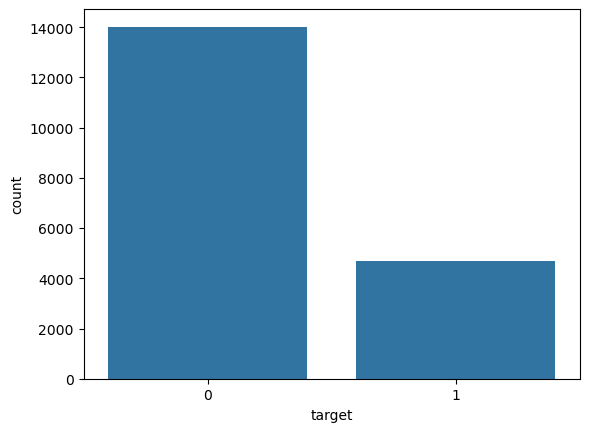

In [482]:
sns.countplot(data=data1, x='target')


In [483]:
y = data1.target
X = data1.drop('target',axis=1)

In [484]:
X

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1,40,0.776,1,1,2,2,5,15,2.0,5,5,47
2,21,0.624,0,1,0,2,5,5,2.0,5,0,83
3,115,0.789,0,1,2,2,1,0,2.0,5,0,52
4,162,0.767,0,0,2,3,5,21,2.0,1,4,8
5,176,0.764,0,0,1,2,5,11,2.0,5,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,1,1,2,2,2,14,1.0,5,1,42
19154,103,0.920,1,0,2,2,5,14,1.0,5,4,52
19155,103,0.920,1,0,2,2,5,21,2.0,5,4,44
19156,65,0.802,1,0,2,1,5,0,4.0,5,2,97


In [485]:
# Smote :- Synthetic Minority Over Sampling Technique

In [486]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [487]:
# Class 0 has 5 points, Class 1 has only 2 points
X1 = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 10, 11],
    'Feature2': [1, 1, 1, 1, 1, 10, 11]
})
y1 = pd.Series([0, 0, 0, 0, 0, 1, 1])  # Class 0 = 5 samples, Class 1 = 2 samples
X1,y1

(   Feature1  Feature2
 0         1         1
 1         2         1
 2         3         1
 3         4         1
 4         5         1
 5        10        10
 6        11        11,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    1
 6    1
 dtype: int64)

In [488]:
smote = SMOTE(k_neighbors=1, random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)
X1,y1,X1_resampled, y1_resampled

(   Feature1  Feature2
 0         1         1
 1         2         1
 2         3         1
 3         4         1
 4         5         1
 5        10        10
 6        11        11,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    1
 6    1
 dtype: int64,
    Feature1  Feature2
 0         1         1
 1         2         1
 2         3         1
 3         4         1
 4         5         1
 5        10        10
 6        11        11
 7        10        10
 8        10        10
 9        10        10,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    1
 6    1
 7    1
 8    1
 9    1
 dtype: int64)

In [489]:
X1

,Feature1,Feature2
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,10,10
6,11,11


In [490]:
X1_resampled

,Feature1,Feature2
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,10,10
6,11,11
7,10,10
8,10,10
9,10,10


In [491]:
y1_resampled

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [492]:
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [493]:
num_before = dict(Counter(y))
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

#Tthe numbers after SMOTE
num_after =dict(Counter(y_smote))

In [494]:
print(num_before, num_after)

{0: 14019, 1: 4671} {0: 14019, 1: 14019}


In [495]:
after_smote=list(num_after.values())
#after_smote.reverse()

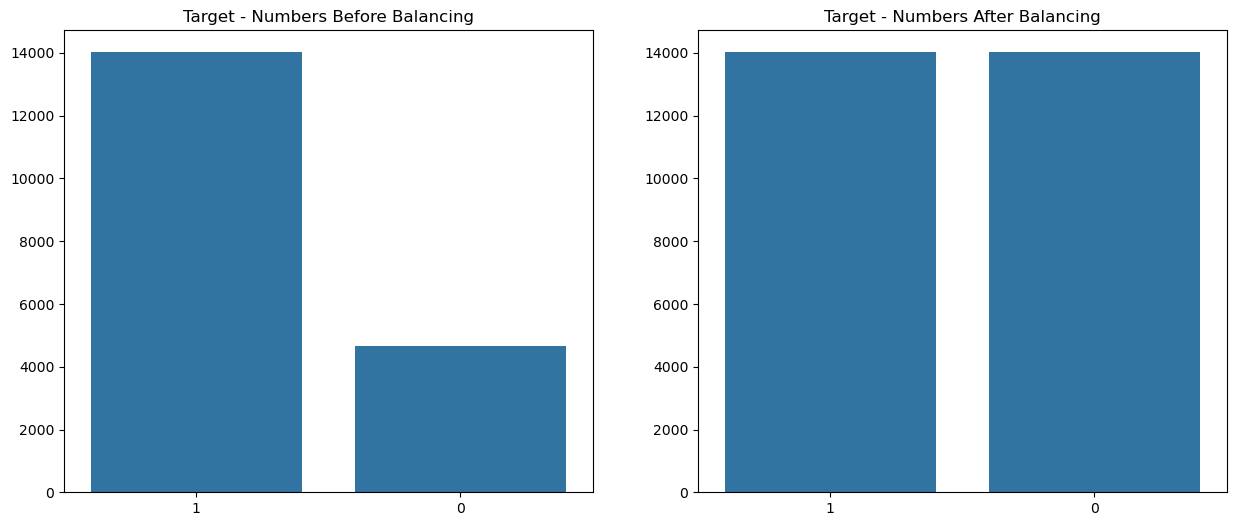

In [496]:
labels = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Target - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=after_smote)
plt.title("Target - Numbers After Balancing")
plt.show()

In [497]:
!pip install xgboost


In [498]:
import xgboost


In [499]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote ,test_size = 0.25, 
                                                    random_state=42)

In [500]:
X_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1097,116,0.743000,1,0,2,3,5,21,5.000000,5,3,178
4291,21,0.624000,1,1,2,2,5,0,7.000000,5,1,88
25964,10,0.895000,0,0,0,2,5,6,1.000000,2,3,21
11192,16,0.910000,1,0,2,0,5,14,3.000000,1,1,36
16671,65,0.802000,1,0,2,2,5,16,5.000000,5,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...
21575,102,0.861346,1,0,1,2,5,9,0.988732,4,1,9
5390,160,0.920000,0,0,2,2,5,11,2.000000,5,5,45
860,103,0.920000,1,0,2,2,5,4,3.000000,5,1,10
15795,81,0.730000,1,0,1,2,5,9,2.000000,5,4,89


In [501]:
X_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
27492,21,0.624,1,0,2,3,5,15,6.190862,5,2,63
20280,21,0.624,1,0,0,2,5,2,2.000000,5,1,67
20580,11,0.550,1,0,1,1,5,4,5.000000,5,1,32
18334,103,0.920,1,0,2,2,5,21,4.000000,5,5,142
6234,16,0.910,1,1,2,2,5,12,5.000000,5,3,150
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,21,0.624,1,0,0,3,5,6,2.000000,5,4,76
263,21,0.624,1,1,2,2,5,0,5.000000,5,1,14
26121,74,0.579,1,0,2,2,5,6,1.568948,5,3,26
15001,10,0.895,1,0,2,3,5,21,1.000000,5,5,20


In [502]:
y_train

1097     0
4291     1
25964    1
11192    0
16671    0
        ..
21575    1
5390     0
860      0
15795    0
23654    1
Name: target, Length: 21028, dtype: int64

In [503]:
y_test

27492    1
20280    1
20580    1
18334    1
6234     1
        ..
2992     1
263      1
26121    1
15001    0
25256    1
Name: target, Length: 7010, dtype: int64

In [504]:
# Feature Scalling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#if needed to scale, then only apply this.

In [506]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [508]:
# To be Continued

In [511]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))    
models.append(('Naive bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', GradientBoostingClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [513]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [515]:
    for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("{} : {}".format(name,accuracy))

Logistic Regression : 0.6878744650499287
Naive bayes : 0.6796005706134094
KNN : 0.733095577746077
CART : 0.7543509272467903
Random Forest : 0.8055634807417974
SVM : 0.7051355206847361
XGBoost : 0.8044222539229672
GradientBoosting : 0.8044222539229672


In [516]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = precision_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.7062766605728215
Naive bayes : 0.6873915558126085
KNN : 0.725506072874494
CART : 0.7490421455938697
Random Forest : 0.8129847744900891
SVM : 0.7052602282215419
XGBoost : 0.8326693227091634
GradientBoosting : 0.8326693227091634


In [517]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = recall_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.6544325239977414
Naive bayes : 0.6710897797854319
KNN : 0.758893280632411
CART : 0.7727272727272727
Random Forest : 0.7989836250705816
SVM : 0.7154150197628458
XGBoost : 0.7670807453416149
GradientBoosting : 0.7670807453416149


In [518]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = f1_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.67936694021102
Naive bayes : 0.6791428571428572
KNN : 0.7418242031185318
CART : 0.7607003891050583
Random Forest : 0.805923394560729
SVM : 0.710301331464611
XGBoost : 0.7985304922850845
GradientBoosting : 0.7985304922850845


In [519]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : [[2504  964]
 [1224 2318]]
Naive bayes : [[2387 1081]
 [1165 2377]]
KNN : [[2451 1017]
 [ 854 2688]]
CART : [[2551  917]
 [ 805 2737]]
Random Forest : [[2817  651]
 [ 712 2830]]
SVM : [[2409 1059]
 [1008 2534]]
XGBoost : [[2922  546]
 [ 825 2717]]
GradientBoosting : [[2922  546]
 [ 825 2717]]


In [520]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)

In [521]:
rfpred = rf.score(X_train, y_train)
rfpred #rf_trainscore

0.9991439984782196

In [522]:
rfpred = rf.score(X_test, y_test)
rfpred #rf_testscore

0.8062767475035664

In [523]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)

In [524]:
from sklearn.model_selection import cross_val_score
rfc_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8171968548396948

In [525]:
from sklearn.model_selection import cross_val_score
rfc_eval = cross_val_score(estimator = rf, X = X_test, y = y_test, cv = 10)
rfc_eval.mean()

0.7743223965763195

In [527]:
y_pred = rf.predict_proba(X_test)
print(y_pred)

#evaluation metrics conclusion to add

[[0.106 0.894]
 [0.018 0.982]
 [0.    1.   ]
 ...
 [0.032 0.968]
 [0.82  0.18 ]
 [0.136 0.864]]


In [528]:
print(rf.feature_importances_)

[0.11132715 0.17974735 0.01605303 0.01829988 0.06007118 0.04405413
 0.02227104 0.11720146 0.14110651 0.03321744 0.06009041 0.19656043]


In [ ]:
importances = rf.feature_importances_
features = data.columns[:12]
imp = pd.DataFrame({'Features': features, 'Importance': importances})

In [ ]:
imp['Sum Importance'] = imp['Importance'].cumsum()
imp

,Features,Importance,Sum Importance
0,city,0.111327,0.111327
1,city_development_index,0.179747,0.291074
2,gender,0.016053,0.307128
3,relevent_experience,0.018300,0.325427
4,enrolled_university,0.060071,0.385499
5,education_level,0.044054,0.429553
6,major_discipline,0.022271,0.451824
7,experience,0.117201,0.569025
8,company_size,0.141107,0.710132
9,company_type,0.033217,0.743349


In [ ]:
imp = imp.sort_values(by = 'Importance')
imp

In [79]:
imp.to_csv("imp.csv")

#imp.to_csv("C:/imp.csv", index=False)

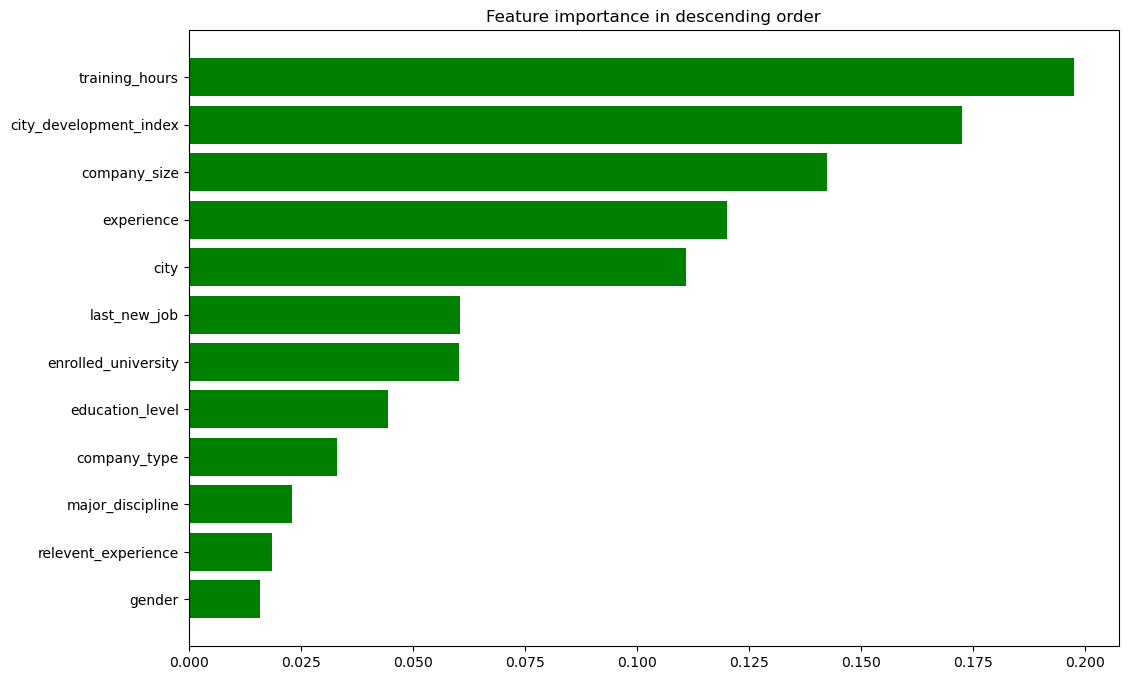

In [80]:
plt.figure(figsize=(12,8))
plt.barh(imp['Features'], imp['Importance'], color = 'g')
plt.title('Feature importance in descending order')
plt.show()
